# Table of content:
* [Import Libraries](#1)
* [Reading Dataset](#2)
* [Data Pre-processing](#3)
* [Modeling](#4)
    1. [Naive Bayes](#7)
    2. [Logistic Regression](#8)
    3. [Support Vector Machines (SVMs)](#9)
    4. [K-Nearest Neighbor (KNN)](#10)
    5. [Random Forests](#11)
    6. [Gradient Boosting](#12)
    7. [All at a glance](#13)
* [Conclusions](#5)
* [References](#6)

# Import Libraries <a id = "1"></a>

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import seaborn as sns
sns.set_style("whitegrid")

import time

import warnings
warnings.filterwarnings("ignore")

# Reading Dataset <a id = "2"></a>

<a href = 'https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset'>Link to the dataset in Kaggle.</a>
  
- Age: Age of the patient
- Sex: Sex of the patient
- cp: Chest Pain type chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- trtbps: resting blood pressure (in mm Hg)
- chol: cholesterol in mg/dl fetched via BMI sensor
- fbs: (fasting blood sugar > 120 mg/dl)
    - Value 0: false
    - Value 1: true
- rest_ecg : resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach: maximum heart rate achieved
- exang: exercise induced angina
    - Value 0: no
    - Value 1: yes
- oldpeak: Previous peak    
- slp: Slope    
- caa: number of major vessels ~ (0-4)
- thall: Thalium Stress Test result ~ (0-3)
- target: 
    - Value 0: less chance of heart attack
    - Value 1: more chance of heart attack

In [2]:
heart_attack = pd.read_csv('heart.csv')
print(f"Shape of dataset: {heart_attack.shape}")
heart_attack.head()

Shape of dataset: (303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart_attack.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Data Pre-processing <a id = "3"></a>

In [4]:
heart_attack.drop_duplicates(inplace = True)
heart_attack.reset_index(drop = True, inplace= True)

print(f"Shape of dataset after removing duplicate rows: {heart_attack.shape}")

Shape of dataset after removing duplicate rows: (302, 14)


In [5]:
def lower_upper(x):
    Q1 = np.percentile(heart_attack[x], 25)
    Q3 = np.percentile(heart_attack[x], 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

def stat_properties(x):
    lower, upper = lower_upper(x)
    print(f'Statistical properties for {x} is:')
    print(f"lower quartile is: {lower:0.2f} and upper quartile is: {upper:0.2f}.")
    print(f"mean is: {heart_attack[x].mean():0.2f}, std is: {heart_attack[x].std():0.2f}, skewness is: {heart_attack[x].skew():0.2f}, and kurtosis is: {heart_attack[x].kurtosis():0.2f}.")
    print("-" * 20)

In [6]:
continuous_feature = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

for i in continuous_feature:
    stat_properties(i)

Statistical properties for age is:
lower quartile is: 28.50 and upper quartile is: 80.50.
mean is: 54.42, std is: 9.05, skewness is: -0.20, and kurtosis is: -0.53.
--------------------
Statistical properties for trtbps is:
lower quartile is: 90.00 and upper quartile is: 170.00.
mean is: 131.60, std is: 17.56, skewness is: 0.72, and kurtosis is: 0.92.
--------------------
Statistical properties for chol is:
lower quartile is: 115.38 and upper quartile is: 370.38.
mean is: 246.50, std is: 51.75, skewness is: 1.15, and kurtosis is: 4.54.
--------------------
Statistical properties for thalachh is:
lower quartile is: 84.12 and upper quartile is: 215.12.
mean is: 149.57, std is: 22.90, skewness is: -0.53, and kurtosis is: -0.06.
--------------------
Statistical properties for oldpeak is:
lower quartile is: -2.40 and upper quartile is: 4.00.
mean is: 1.04, std is: 1.16, skewness is: 1.27, and kurtosis is: 1.57.
--------------------


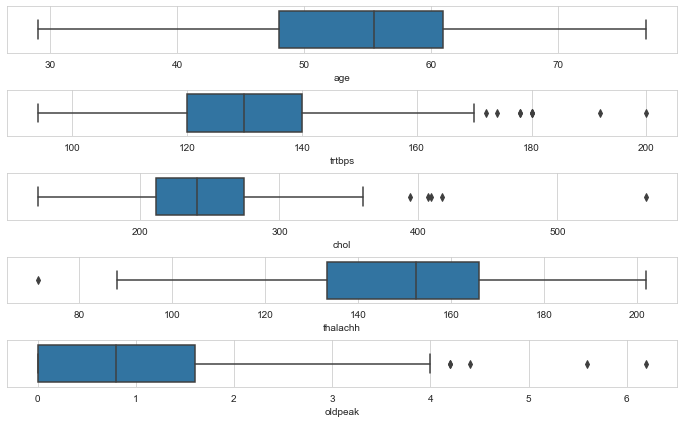

In [7]:
fig, ax = plt.subplots(len(continuous_feature), 1, figsize = (12,7))

for i,j in zip(range(0, len(continuous_feature)), continuous_feature):
    sns.boxplot(ax = ax[i], x = heart_attack[j])
plt.subplots_adjust(hspace = 0.8)    

In [8]:
# Removing the outliers.

heart_attack_without_outliers = heart_attack.copy()

outliers_index = list(np.where((heart_attack['trtbps']> 180) | 
                          (heart_attack['chol']> 500) | 
                          (heart_attack['oldpeak']> 5)
                         )[0])

heart_attack_without_outliers.drop(index = outliers_index, inplace = True)
heart_attack_without_outliers.reset_index(drop = True, inplace = True)

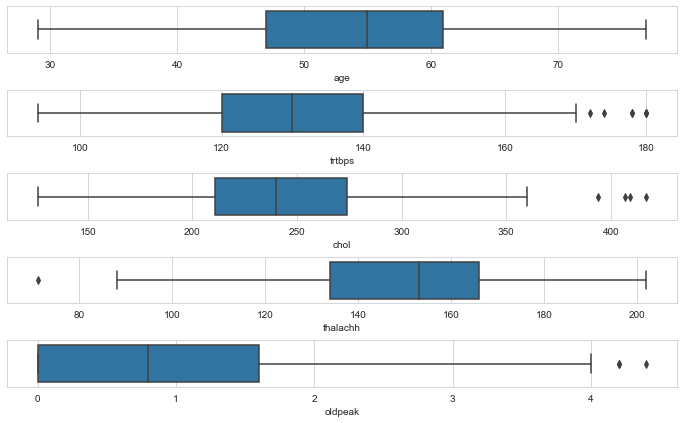

In [9]:
fig, ax = plt.subplots(len(continuous_feature), 1, figsize = (12,7))

for i,j in zip(range(0, len(continuous_feature)), continuous_feature):
    sns.boxplot(ax = ax[i], x = heart_attack_without_outliers[j])
plt.subplots_adjust(hspace = 0.8) 

# Modeling <a id = "4"></a>

In [10]:
X = np.asarray(heart_attack_without_outliers.drop(columns = ['output']))
y = np.asarray(heart_attack_without_outliers['output'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
def fit_with_best_parameters(model, parameters):
    
    grid = GridSearchCV(model, param_grid = parameters, cv = 5, refit = True, n_jobs = -1)
    grid.fit(X_train_scaled, y_train)
    y_pred = grid.predict(X_test_scaled)
    
    y_diff = y_test.copy()
    mis_prediction = ~(y_pred == y_test)
    y_diff[mis_prediction] = -1 # Mispredictions are considered equal to negative one.
    
    acc = round(accuracy_score(y_test, y_pred) * 100, 3)
    l_loss = round(log_loss(y_test, y_pred), 2)
    
    fp = confusion_matrix(y_test, y_pred)[0, 1]
    fn = confusion_matrix(y_test, y_pred)[1, 0]
    
    model_name = str(model).split('(')[0]
    
    print(f"Best parameters for {model_name}: {grid.best_params_}")
    print('-'*10)
    print(f"Classification report for {model_name}:\n {classification_report(y_test, y_pred)}")
    print(f"Confusion matrix for {model_name}:\n {confusion_matrix(y_test, y_pred)}")
    print(f"Accuracy for {model_name}: {accuracy_score(y_test, y_pred):0.2%}")
    print(f"Cross-entropy loss for {model_name}: {log_loss(y_test, y_pred):0.2f}")
    
    return y_pred, y_diff, acc, l_loss, fn, fp

### 1. Naive Bayes <a id = "7"></a>
Naive Bayes classifier, one of the simplest and effective classification algorithms. Its basis is Bayes' theorem which describes how the probability of an event is evaluated based on prior knowledge of conditions that might be related to the event.
<img src='https://latex.codecogs.com/gif.latex?%5Cdpi%7B150%7D%20P%5Cleft%20%28%20Y%7CX_%7B1%7D%3Dx_%7B1%7D%2CX_%7B2%7D%3Dx_%7B2%7D%20%5Cright%20%29%3D%5Cfrac%7BP%5Cleft%20%28%20X_%7B1%7D%3Dx_%7B1%7D%2CX_%7B2%7D%20%3Dx_%7B2%7D%7CY%20%5Cright%20%29P%5Cleft%20%28%20Y%20%5Cright%20%29%7D%7BP%5Cleft%20%28%20X_%7B1%7D%3Dx_%7B1%7D%2CX_%7B2%7D%3Dx_%7B2%7D%20%5Cright%20%29%7D' />

In [13]:
param_grid_gnb = [{'var_smoothing': [1e-13, 1e-11, 1e-9, 1e-7, 1e-5]
                  }]
gnb = GaussianNB()

y_pred_gnb, y_diff_gnb, acc_gnb, log_loss_gnb, fn_gnb, fp_gnb = fit_with_best_parameters(gnb, param_grid_gnb)

Best parameters for GaussianNB: {'var_smoothing': 1e-13}
----------
Classification report for GaussianNB:
               precision    recall  f1-score   support

           0       0.96      0.74      0.84        31
           1       0.78      0.97      0.86        29

    accuracy                           0.85        60
   macro avg       0.87      0.85      0.85        60
weighted avg       0.87      0.85      0.85        60

Confusion matrix for GaussianNB:
 [[23  8]
 [ 1 28]]
Accuracy for GaussianNB: 85.00%
Cross-entropy loss for GaussianNB: 5.18


### 2. Logistic Regression <a id = "8"></a>
This algorithm is similar to Bayes' classifier as it also predicts the probability that Y is associated with an input variable, X.
<img src='https://latex.codecogs.com/gif.latex?%5Cdpi%7B150%7D%20P%5Cleft%20%28%20X%20%5Cright%20%29%3D%20%5Cfrac%7Be%5E%7B%5Cbeta%20_%7B0%7D+%5Cbeta%20_%7B1%7DX_%7B1%7D+%5Ccdots+%5Cbeta%20_%7Bp%7DX_%7Bp%7D%7D%7D%7B1+%7Be%5E%7B%5Cbeta%20_%7B0%7D+%5Cbeta%20_%7B1%7DX_%7B1%7D+%5Ccdots+%5Cbeta%20_%7Bp%7DX_%7Bp%7D%7D%7D' />

In [14]:
param_grid_lr = [{'penalty': ['l1', 'l2', 'elasticnet'],
                  'C': [0.1, 1, 10],
                  'solver': ['lbfgs', 'liblinear']
                  }]
lr = LogisticRegression(random_state = 1)

y_pred_lr, y_diff_lr, acc_lr, log_loss_lr, fn_lr, fp_lr = fit_with_best_parameters(lr, param_grid_lr)

Best parameters for LogisticRegression: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
----------
Classification report for LogisticRegression:
               precision    recall  f1-score   support

           0       0.96      0.77      0.86        31
           1       0.80      0.97      0.88        29

    accuracy                           0.87        60
   macro avg       0.88      0.87      0.87        60
weighted avg       0.88      0.87      0.87        60

Confusion matrix for LogisticRegression:
 [[24  7]
 [ 1 28]]
Accuracy for LogisticRegression: 86.67%
Cross-entropy loss for LogisticRegression: 4.61


### 3. Support Vector Machines (SVMs) <a id = "9"></a>
This algorithm utilizes support vector classifiers with an exciting change that makes it suitable for evaluating a non-linear decision boundary. And that becomes possible by enlarging the feature variable space using special functions called kernels. The decision boundary that this algorithm considers allows labeling the feature variable to a target variable.
<img src='https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm5.png' />

In [15]:
param_grid_svm = [{'C': [0.1, 1, 10],
                   'kernel': ['linear', 'poly', 'rbf']
                   }]
svc = SVC(random_state = 1)

y_pred_svm, y_diff_svm, acc_svm, log_loss_svm, fn_svm, fp_svm = fit_with_best_parameters(svc, param_grid_svm)

Best parameters for SVC: {'C': 0.1, 'kernel': 'linear'}
----------
Classification report for SVC:
               precision    recall  f1-score   support

           0       0.96      0.71      0.81        31
           1       0.76      0.97      0.85        29

    accuracy                           0.83        60
   macro avg       0.86      0.84      0.83        60
weighted avg       0.86      0.83      0.83        60

Confusion matrix for SVC:
 [[22  9]
 [ 1 28]]
Accuracy for SVC: 83.33%
Cross-entropy loss for SVC: 5.76


### 4. K-Nearest Neighbor (KNN) <a id = "10"></a>
KNN algorithm works by identifying K nearest neighbors to a given observation point. It then evaluates the proportions of each type of target variable using the K points and then predicts the target variable with the highest ratio. For example, consider the following case where we have to label a target value to point X. Then, if we take four neighbors around it, this model will predict that the point belongs to class with the color pink.
<img src='https://static.javatpoint.com/tutorial/machine-learning/images/k-nearest-neighbor-algorithm-for-machine-learning2.png' />

In [16]:
param_grid_knn = [{'weights': ['uniform', 'distance'],
                   'n_neighbors': [3, 5, 7, 9]
                   }]
knn = KNeighborsClassifier()

y_pred_knn, y_diff_knn, acc_knn, log_loss_knn, fn_knn, fp_knn = fit_with_best_parameters(knn, param_grid_knn)

Best parameters for KNeighborsClassifier: {'n_neighbors': 5, 'weights': 'uniform'}
----------
Classification report for KNeighborsClassifier:
               precision    recall  f1-score   support

           0       0.96      0.74      0.84        31
           1       0.78      0.97      0.86        29

    accuracy                           0.85        60
   macro avg       0.87      0.85      0.85        60
weighted avg       0.87      0.85      0.85        60

Confusion matrix for KNeighborsClassifier:
 [[23  8]
 [ 1 28]]
Accuracy for KNeighborsClassifier: 85.00%
Cross-entropy loss for KNeighborsClassifier: 5.18


### 5. Random Forests <a id = "11"></a>
A forest consists of a large number of trees. Similarly, a random forest involves processing many decision trees. Each tree predicts a value for the probability of target variables. We then average the probabilities to produce the final output. 

In [17]:
param_grid_rfc = [{'criterion': ['gini', 'entropy'],
                   'max_depth': [3, 5, 7],
                   }]
rfc = RandomForestClassifier(random_state = 1)

y_pred_rfc, y_diff_rfc, acc_rfc, log_loss_rfc, fn_rfc, fp_rfc = fit_with_best_parameters(rfc, param_grid_rfc)

Best parameters for RandomForestClassifier: {'criterion': 'gini', 'max_depth': 3}
----------
Classification report for RandomForestClassifier:
               precision    recall  f1-score   support

           0       0.95      0.68      0.79        31
           1       0.74      0.97      0.84        29

    accuracy                           0.82        60
   macro avg       0.85      0.82      0.81        60
weighted avg       0.85      0.82      0.81        60

Confusion matrix for RandomForestClassifier:
 [[21 10]
 [ 1 28]]
Accuracy for RandomForestClassifier: 81.67%
Cross-entropy loss for RandomForestClassifier: 6.33


### 6. Gradient Boosting  <a id = "12"></a>
Gradient boosting is a type of machine learning boosting. It relies on the intuition that the best possible next model, when combined with previous models, minimizes the overall prediction error. The name gradient boosting arises because target outcomes for each case are set based on the gradient of the error with respect to the prediction. Each new model takes a step in the direction that minimizes prediction error, in the space of possible predictions for each training case.

In [18]:
param_grid_gbc = [{'learning_rate': [0.01, 0.1, 1],
                   'max_depth': [3, 5, 7]
                   }]
gbc = GradientBoostingClassifier(loss = 'exponential', random_state = 1)

y_pred_gbc, y_diff_gbc, acc_gbc, log_loss_gbc, fn_gbc, fp_gbc = fit_with_best_parameters(gbc, param_grid_gbc)

Best parameters for GradientBoostingClassifier: {'learning_rate': 0.01, 'max_depth': 3}
----------
Classification report for GradientBoostingClassifier:
               precision    recall  f1-score   support

           0       0.91      0.68      0.78        31
           1       0.73      0.93      0.82        29

    accuracy                           0.80        60
   macro avg       0.82      0.80      0.80        60
weighted avg       0.82      0.80      0.80        60

Confusion matrix for GradientBoostingClassifier:
 [[21 10]
 [ 2 27]]
Accuracy for GradientBoostingClassifier: 80.00%
Cross-entropy loss for GradientBoostingClassifier: 6.91


### 7. All at a glance <a id = "13"></a>

In [19]:
models = ['GaussianNB', 'LogisticRegression', 'SVM',
          'KNeighborsClassifier', 'RandomForestClassifier', 
          'GradientBoostingClassifier']

y_pred = [y_pred_gnb, y_pred_lr, y_pred_svm, y_pred_knn, y_pred_rfc, y_pred_gbc]

y_diff = [y_diff_gnb, y_diff_lr, y_diff_svm, y_diff_knn, y_diff_rfc, y_diff_gbc]

accuracy = [acc_gnb, acc_lr ,acc_svm, acc_knn, acc_rfc, acc_gbc]

log_losses = [log_loss_gnb, log_loss_lr ,log_loss_svm, log_loss_knn, log_loss_rfc, log_loss_gbc]

fns = [fn_gnb, fn_lr, fn_svm, fn_knn, fn_rfc, fn_gbc]

fps = [fp_gnb, fp_lr, fp_svm, fp_knn, fp_rfc, fp_gbc]

In [20]:
pca = PCA(n_components = 2, random_state = 1)
X_test_2d = pca.fit_transform(X_test_scaled)

In [21]:
def plot_2d_with_labels(models, y_diff, y_pred, fns, fps):
    
    fig = plt.figure(figsize = (18, 15))
    fig.subplots_adjust(hspace = 0.10, wspace = 0.05)
    fig.suptitle('Comparison of prediction performance of models on the test data\n(In each plot, the numbers written are the ground truth labels and the colorings are based on the performance of the models)', fontsize = 18)

    for i, model, fn, fp, diff, pred in zip(range(len(models)), models, fns, fps, y_diff, y_pred):
        
        plt.subplot(3, 2, i + 1)
        
        plt.gca().set_title(f"In the {model} #FN is {fn} and #FP is {fp}.", fontsize = 18)
        plt.gca().get_xaxis().set_visible(False)
        plt.gca().get_yaxis().set_visible(False)
        
        sns.scatterplot(x = X_test_2d[:,0], y = X_test_2d[:,1], alpha = 0.5, 
                        hue = diff , s = 100, palette=["green", "red", "blue"])
        plt.legend(["G. truth & model show 1", "G. truth and model mismatch", 
                    "G. truth & model show 0"], fontsize = 12, loc='upper left')

        for j, cord in enumerate(X_test_2d):
            plt.text(cord[0], cord[1], pred[j], horizontalalignment = 'center',
                     fontdict = {'weight': 'bold', 'color': 'black','size': 12})            

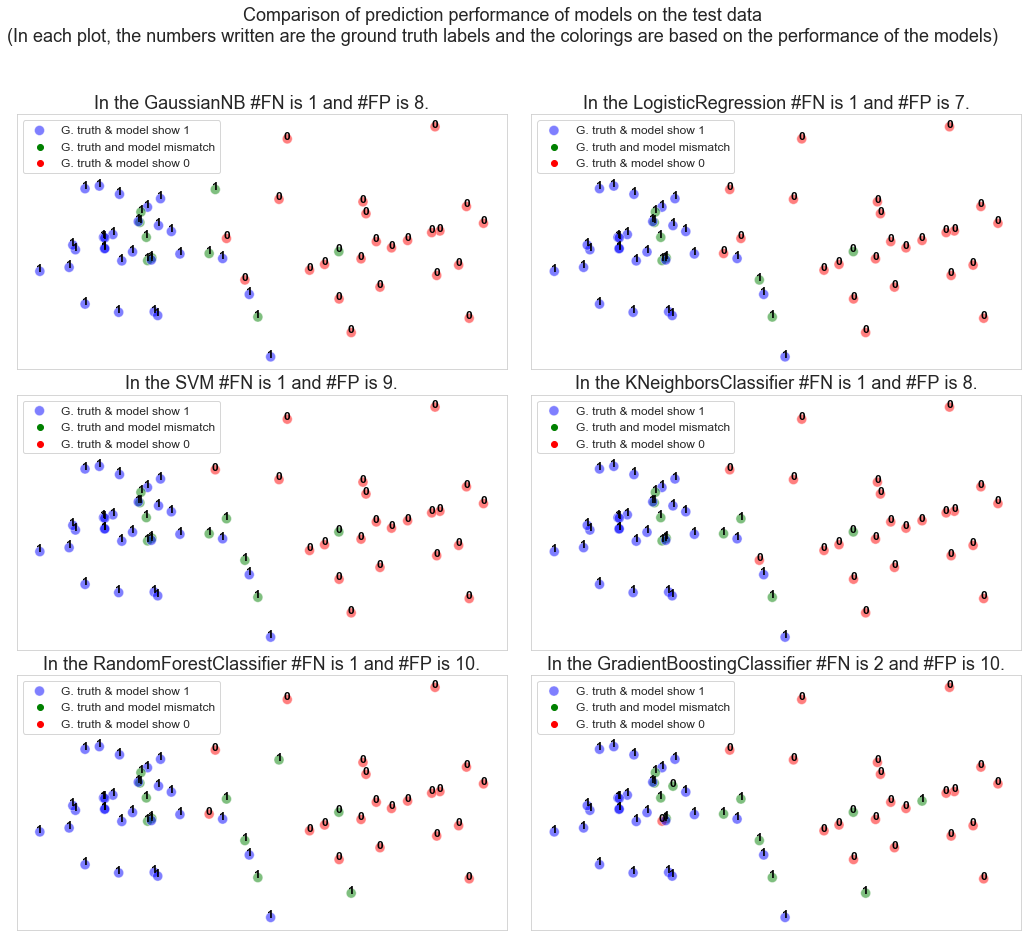

In [22]:
plot_2d_with_labels(models, y_diff, y_pred, fns, fps)

# Conclusions <a id = "5"></a>

In [23]:
model_metrics = pd.DataFrame({'Accuracy': accuracy,
                              'Cross-entropy loss': log_losses},
                              index = models) 
model_metrics

,Accuracy,Cross-entropy loss
GaussianNB,85.000,5.18
LogisticRegression,86.667,4.61
SVM,83.333,5.76
KNeighborsClassifier,85.000,5.18
RandomForestClassifier,81.667,6.33
GradientBoostingClassifier,80.000,6.91


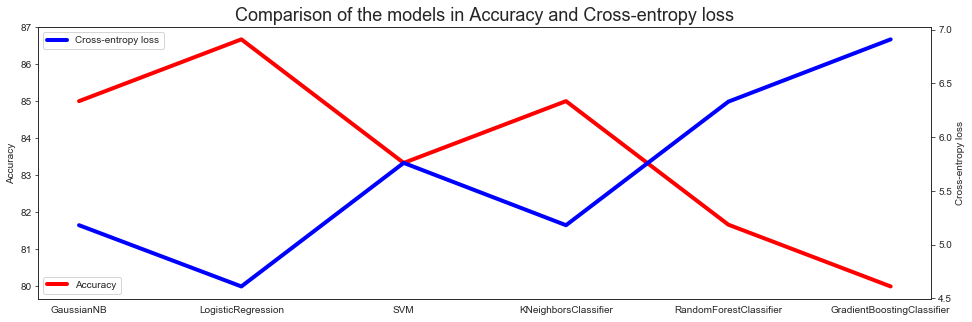

In [24]:
sns.set_style('white')
 
fig, ax = plt.subplots(figsize = (16,5))
ax.set_title('Comparison of the models in Accuracy and Cross-entropy loss', fontsize = 18)

ax = sns.lineplot(data = model_metrics['Accuracy'], color = 'red', linewidth = 4)
ax.legend(labels = ['Accuracy'], loc='lower left')
ax_new = ax.twinx()

ax_new = sns.lineplot(data = model_metrics['Cross-entropy loss'], color = 'blue', linewidth = 4)
ax_new.legend(labels = ['Cross-entropy loss'], loc='upper left')

The above plot shows that **LogisticRegression** is the best model for training. Because it has the lowest cross-entropy loss and the highest accuracy between the models.

# References<a id = "6"></a>

- https://www.javatpoint.com
- <a href = "https://www.projectpro.io/article/7-types-of-classification-algorithms-in-machine-learning/435">7 Types of Classification Algorithms in Machine Learning</a>
- <a href = "https://www.displayr.com/gradient-boosting-the-coolest-kid-on-the-machine-learning-block/#:~:text=Gradient%20boosting%20is%20a%20type,minimizes%20the%20overall%20prediction%20error.&text=reduce%20the%20error.-,If%20a%20small%20change%20in%20the%20prediction%20for%20a%20case,of%20the%20case%20is%20zero.">Gradient Boosting Explained</a>